<a href="https://colab.research.google.com/github/Pranov1984/Image-Classification/blob/master/Dog_Cat_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from skimage import data, io
import matplotlib.pyplot as plt

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import warnings
# Suppress warnings
warnings.filterwarnings('ignore')

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#import os
#import zipfile

#local_zip = '/tmp/cats_and_dogs_filtered.zip'
#zip_ref = zipfile.ZipFile(local_zip, 'r')
#zip_ref.extractall('/tmp')
#zip_ref.close()

The contents of the .zip are extracted to the base directory /tmp/cats_and_dogs_filtered, which contains train and validation subdirectories for the training and validation datasets 

In [0]:
base_dir = '/content/gdrive/My Drive/Colab Notebooks/Udemy_DL_Conv/dataset'
train_dir = os.path.join(base_dir, 'training_set')
test_dir = os.path.join(base_dir, 'test_set')
val_dir = os.path.join(base_dir, 'val_set')
# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our test cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')

# Directory with our test dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')

# Directory with our validation cat pictures
val_cats_dir = os.path.join(val_dir, 'cats')

# Directory with our validation dog pictures
val_dogs_dir = os.path.join(val_dir, 'dogs')

Now, let's see what the filenames look like in the cats and dogs train directories (file naming conventions are the same in the validation directory):

In [0]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.370.jpg', 'cat.3700.jpg', 'cat.3699.jpg', 'cat.3705.jpg', 'cat.3704.jpg', 'cat.3702.jpg', 'cat.3701.jpg', 'cat.3703.jpg', 'cat.3706.jpg', 'cat.3707.jpg']
['dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.1000.jpg', 'dog.1001.jpg', 'dog.1002.jpg', 'dog.1003.jpg', 'dog.1004.jpg', 'dog.1005.jpg', 'dog.1006.jpg']


In [0]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))
print('total validation cat images:', len(os.listdir(val_cats_dir)))
print('total validation dog images:', len(os.listdir(val_dogs_dir)))

total training cat images: 4000
total training dog images: 4000
total test cat images: 900
total test dog images: 900
total validation cat images: 100
total validation dog images: 100


For both cats and dogs, we have 4,000 training images for and cats.Similarly 1000 test images for cats and dogs each.100 each as validation images

Now let's take a look at a few pictures to get a better sense of what the cat and dog datasets look like. First, configure the matplot parameters:




In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Now, display a batch of 8 cat and 8 dog pictures. You can rerun the cell to see a fresh batch each time:

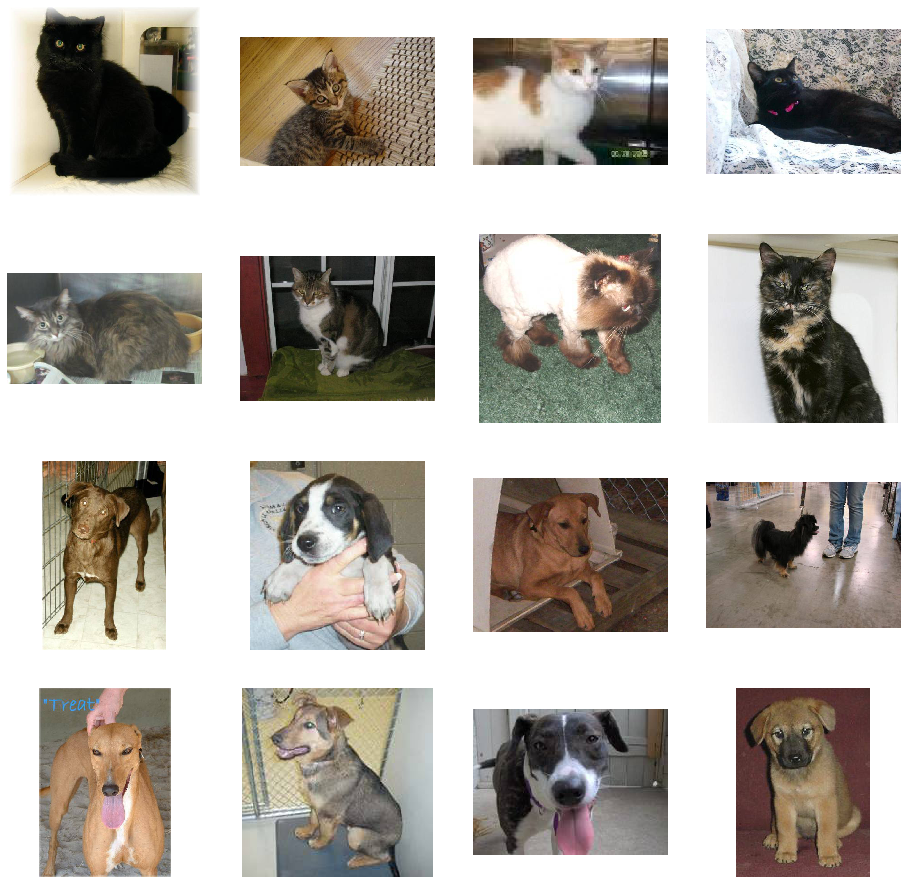

In [0]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Let's build a convolution neural network by training it on the training images and then use it to classify the pictures in the test set

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation, BatchNormalization, Dropout
from keras import optimizers

Using TensorFlow backend.


In [0]:
classifier = Sequential()

classifier.add(Conv2D(32,(3,3), input_shape=(64,64,3), activation='relu', padding='same'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(64,(3,3), activation='relu', padding='same'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten())

classifier.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.3))


classifier.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.3))

classifier.add(Dense(1, activation='sigmoid', kernel_initializer='he_normal'))

optimizer=optimizers.adam(lr=0.001)

classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
from keras.preprocessing.image  import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.25,
                                 zoom_range=0.2,horizontal_flip = True)

test_datagen=ImageDataGenerator(rescale=1./255)

training_set= train_datagen.flow_from_directory(train_dir,
                                                target_size=(64,64),
                                                batch_size=32,
                                                class_mode='binary')

test_set= train_datagen.flow_from_directory(test_dir,
                                                target_size=(64,64),
                                                batch_size=32,
                                                class_mode='binary')


Found 8000 images belonging to 2 classes.
Found 1800 images belonging to 2 classes.


In [0]:
history = classifier.fit_generator(training_set,
                                   samples_per_epoch=4000,
                                   nb_epoch=10,
                                   validation_data=test_set,
                                   nb_val_samples=1000)

Epoch 1/10
125/125 [==============================] - 755s 6s/step - loss: 0.6978 - acc: 0.6093 - val_loss: 0.6367 - val_acc: 0.6290
Epoch 2/10
125/125 [==============================] - 730s 6s/step - loss: 0.6626 - acc: 0.6275 - val_loss: 0.7317 - val_acc: 0.5911
Epoch 3/10
125/125 [==============================] - 147s 1s/step - loss: 0.6256 - acc: 0.6628 - val_loss: 0.6881 - val_acc: 0.6460
Epoch 4/10
125/125 [==============================] - 146s 1s/step - loss: 0.5954 - acc: 0.6893 - val_loss: 0.8016 - val_acc: 0.5932
Epoch 5/10
125/125 [==============================] - 147s 1s/step - loss: 0.5733 - acc: 0.6970 - val_loss: 0.6931 - val_acc: 0.6372
Epoch 6/10
125/125 [==============================] - 148s 1s/step - loss: 0.5673 - acc: 0.7005 - val_loss: 0.5446 - val_acc: 0.7267
Epoch 7/10
125/125 [==============================] - 148s 1s/step - loss: 0.5334 - acc: 0.7275 - val_loss: 0.5581 - val_acc: 0.7228
Epoch 8/10
125/125 [==============================] - 146s 1s/step - 

*Let*'s change the architecture

In [0]:
classifier = Sequential()

classifier.add(Conv2D(32,(3,3), input_shape=(64,64,3), activation='relu', padding='same'))
classifier.add(MaxPooling2D(pool_size = (3, 3)))

classifier.add(Conv2D(64,(3,3), activation='relu', padding='same'))
classifier.add(MaxPooling2D(pool_size = (3, 3)))

classifier.add(Flatten())

classifier.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.3))


classifier.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.3))

classifier.add(Dense(1, activation='sigmoid', kernel_initializer='he_normal'))

optimizer=optimizers.adam(lr=0.001)

classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.25,
                                 zoom_range=0.2,horizontal_flip = True)

test_datagen=ImageDataGenerator(rescale=1./255)

training_set= train_datagen.flow_from_directory(train_dir,
                                                target_size=(64,64),
                                                batch_size=32,
                                                class_mode='binary')

test_set= train_datagen.flow_from_directory(test_dir,
                                                target_size=(64,64),
                                                batch_size=32,
                                                class_mode='binary')

Found 8000 images belonging to 2 classes.
Found 1800 images belonging to 2 classes.


In [0]:
history = classifier.fit_generator(training_set,
                                   samples_per_epoch=4000,
                                   nb_epoch=10,
                                   validation_data=test_set,
                                   nb_val_samples=1000)

Epoch 1/10
125/125 [==============================] - 149s 1s/step - loss: 0.7550 - acc: 0.5847 - val_loss: 1.9585 - val_acc: 0.5006
Epoch 2/10
125/125 [==============================] - 147s 1s/step - loss: 0.6927 - acc: 0.6228 - val_loss: 1.7922 - val_acc: 0.5027
Epoch 3/10
125/125 [==============================] - 147s 1s/step - loss: 0.6304 - acc: 0.6613 - val_loss: 0.7500 - val_acc: 0.5564
Epoch 4/10
125/125 [==============================] - 148s 1s/step - loss: 0.5765 - acc: 0.7020 - val_loss: 0.6772 - val_acc: 0.6405
Epoch 5/10
125/125 [==============================] - 147s 1s/step - loss: 0.5593 - acc: 0.7182 - val_loss: 0.8032 - val_acc: 0.5739
Epoch 6/10
125/125 [==============================] - 148s 1s/step - loss: 0.5482 - acc: 0.7260 - val_loss: 0.6355 - val_acc: 0.6680
Epoch 7/10
125/125 [==============================] - 147s 1s/step - loss: 0.5013 - acc: 0.7595 - val_loss: 0.6092 - val_acc: 0.6851
Epoch 8/10
125/125 [==============================] - 148s 1s/step - 

Repalce a deep layer with a conv layer

In [0]:
classifier = Sequential()

classifier.add(Conv2D(32,(3,3), input_shape=(64,64,3), activation='relu', padding='same'))
classifier.add(MaxPooling2D(pool_size = (3, 3)))

classifier.add(Conv2D(64,(3,3), activation='relu', padding='same'))
classifier.add(MaxPooling2D(pool_size = (3, 3)))

classifier.add(Conv2D(64,(3,3), activation='relu', padding='same'))
classifier.add(MaxPooling2D(pool_size = (3, 3)))

classifier.add(Flatten())


classifier.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.3))

classifier.add(Dense(1, activation='sigmoid', kernel_initializer='he_normal'))

optimizer=optimizers.adam(lr=0.0001)

classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.25,
                                 zoom_range=0.2,
                                 rotation_range=40,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 horizontal_flip = True)

test_datagen=ImageDataGenerator(rescale=1./255)

training_set= train_datagen.flow_from_directory(train_dir,
                                                target_size=(64,64),
                                                batch_size=32,
                                                class_mode='binary')

test_set= train_datagen.flow_from_directory(test_dir,
                                                target_size=(64,64),
                                                batch_size=32,
                                                class_mode='binary')

Found 8000 images belonging to 2 classes.
Found 1800 images belonging to 2 classes.


In [0]:
history = classifier.fit_generator(training_set,
                                   samples_per_epoch=100,
                                   nb_epoch=50,
                                   validation_data=test_set,
                                   nb_val_samples=50)

Epoch 1/50
3/3 [==============================] - 9s 3s/step - loss: 0.7504 - acc: 0.5208 - val_loss: 0.7642 - val_acc: 0.4969
Epoch 2/50
3/3 [==============================] - 7s 2s/step - loss: 0.7562 - acc: 0.4896 - val_loss: 0.8168 - val_acc: 0.4918
Epoch 3/50
3/3 [==============================] - 7s 2s/step - loss: 0.7654 - acc: 0.4792 - val_loss: 0.8477 - val_acc: 0.5108
Epoch 4/50
3/3 [==============================] - 7s 2s/step - loss: 0.7896 - acc: 0.4792 - val_loss: 0.8647 - val_acc: 0.5044
Epoch 5/50
3/3 [==============================] - 7s 2s/step - loss: 0.7437 - acc: 0.4583 - val_loss: 0.8467 - val_acc: 0.5152
Epoch 6/50
3/3 [==============================] - 7s 2s/step - loss: 0.7225 - acc: 0.4792 - val_loss: 0.8484 - val_acc: 0.4949
Epoch 7/50
3/3 [==============================] - 7s 2s/step - loss: 0.7491 - acc: 0.4271 - val_loss: 0.8382 - val_acc: 0.5063
Epoch 8/50
3/3 [==============================] - 7s 2s/step - loss: 0.6730 - acc: 0.5729 - val_loss: 0.8431 - 

In [0]:
# The second model gave better results

Let's try feature extraction by using the convolutional base of the VGG16 network, trained on ImageNet, to extract interesting features from our cat and dog images, and then training a cat vs. dog classifier on top of these features.

In [0]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))





58892288/58889256 [==============================] - 1s 0us/step








We passed three arguments to the constructor:

weights, to specify which weight checkpoint to initialize the model from

include_top, which refers to including or not the densely-connected classifier on top of the network. By default, this densely-connected classifier would correspond to the 1000 classes from ImageNet. Since we intend to use our own densely-connected classifier (with only two classes, cat and dog), we don't need to include it.

input_shape, the shape of the image tensors that we will feed to the network. This argument is purely optional: if we don't pass it, then the network will be able to process inputs of any size.

Here's the detail of the architecture of the VGG16 convolutional base: it's very similar to the simple convnets that you are already familiar with.

In [0]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [0]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(val_dir, 100)
test_features, test_labels = extract_features(test_dir, 1000)

Found 8000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 1800 images belonging to 2 classes.


The extracted features are currently of shape (samples, 4, 4, 512). We will feed them to a densely-connected classifier, so first we must flatten them to (samples, 8192):

In [0]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (100, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

At this point, we can define our densely-connected classifier (note the use of dropout for regularization), and train it on the data and labels that we just recorded:

In [0]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(test_features, test_labels))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 481us/step - loss: 0.6088 - acc: 0.6570 - val_loss: 0.4668 - val_acc: 0.8130
Epoch 2/30
2000/2000 [==============================] - 1s 297us/step - loss: 0.4339 - acc: 0.8055 - val_loss: 0.3903 - val_acc: 0.8440
Epoch 3/30
2000/2000 [==============================] - 1s 305us/step - loss: 0.3793 - acc: 0.8375 - val_loss: 0.3484 - val_acc: 0.8610
Epoch 4/30
2000/2000 [==============================] - 1s 311us/step - loss: 0.3241 - acc: 0.8645 - val_loss: 0.3255 - val_acc: 0.8630
Epoch 5/30
2000/2000 [==============================] - 1s 298us/step - loss: 0.3005 - acc: 0.8745 - val_loss: 0.3109 - val_acc: 0.8710
Epoch 6/30
2000/2000 [==============================] - 1s

Training is very fast, since we only have to deal with two Dense layers -- an epoch takes less than one second even on CPU.

Let's take a look at the loss and accuracy curves during training:

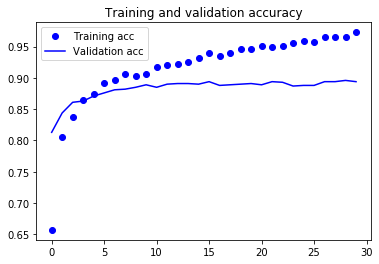

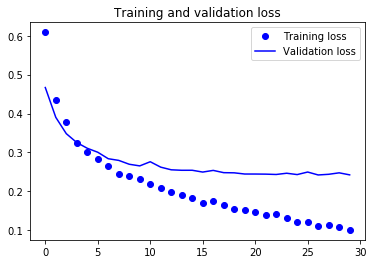

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

We reach a validation accuracy of about 90%, much better than what we could achieve in the previous section with our small model trained from scratch. However, our plots also indicate that we are overfitting almost from the start -- despite using dropout with a fairly large rate. This is because this technique does not leverage data augmentation, which is essential to preventing overfitting with small image datasets.

Now, let's review another second technique i.e. extending the conv_base model and running it end-to-end on the inputs. This is much slower and more expensive,but which allows us to leverage data augmentation during training: 

Because models behave just like layers, you can add a model (like our conv_base)to a Sequential model just like you would add a layer. So you can do the following:

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [0]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [0]:
conv_base.trainable = False

In [0]:
print('This is the number of trainable weights '
      'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Found 8000 images belonging to 2 classes.
Found 1800 images belonging to 2 classes.
Epoch 1/30
 - 368s - loss: 0.6111 - acc: 0.6730 - val_loss: 0.4685 - val_acc: 0.8030
Epoch 2/30
 - 325s - loss: 0.4838 - acc: 0.7855 - val_loss: 0.3770 - val_acc: 0.8510
Epoch 3/30
 - 254s - loss: 0.4324 - acc: 0.8065 - val_loss: 0.3394 - val_acc: 0.8580
Epoch 4/30
 - 274s - loss: 0.4271 - acc: 0.8070 - val_loss: 0.3135 - val_acc: 0.8770
Epoch 5/30
 - 20s - loss: 0.4026 - acc: 0.8205 - val_loss: 0.3040 - val_acc: 0.8690
Epoch 6/30
 - 20s - loss: 0.3653 - acc: 0.8405 - val_loss: 0.2845 - val_acc: 0.8830
Epoch 7/30
 - 20s - loss: 0.3847 - acc: 0.8175 - val_loss: 0.2809 - val_acc: 0.8900
Epoch 8/30
 - 21s - loss: 0.3582 - acc: 0.8400 - val_loss: 0.2922 - val_acc: 0.8790
Epoch 9/30
 - 21s - loss: 0.3558 - acc: 0.8385 - val_loss: 0.2931 - val_acc: 0.8690
Epoch 10/30
 - 20s - loss: 0.3489 - acc: 0.8435 - val_loss: 0.2692 - val_acc: 0.8890
Epoch 11/30
 - 21s - loss: 0.3412 - acc: 0.8480 - val_loss: 0.2835 - va

In [0]:
model.save('Dog_cat_with_PretrainedModel.h5')

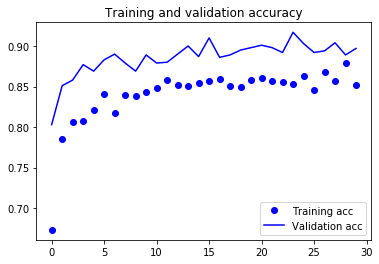

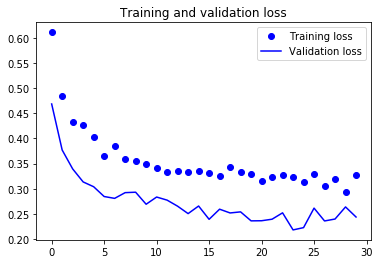

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##Fine-tuning

Another widely used technique for model reuse, complementary to feature extraction, is fine-tuning. Fine-tuning consists in unfreezing a few of the top layers of a frozen model base used for feature extraction, and jointly training both the newly added part of the model (in our case, the fully-connected classifier) and these top layers. This is called "fine-tuning" because it slightly adjusts the more abstract representations of the model being reused, in order to make them more relevant for the problem at hand.


Thus the steps for fine-tuning a network are as follow:

1) Add your custom network on top of an already trained base network.

2) Freeze the base network.

3) Train the part you added.

4) Unfreeze some layers in the base network.

5) Jointly train both these layers and the part you added.

In [0]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [0]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [0]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 10


In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 8000 images belonging to 2 classes.
Found 1800 images belonging to 2 classes.


In [0]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
100/100 [==============================] - 754s 8s/step - loss: 0.5282 - acc: 0.7270 - val_loss: 0.3881 - val_acc: 0.8140
Epoch 2/100
100/100 [==============================] - 625s 6s/step - loss: 0.3994 - acc: 0.8175 - val_loss: 0.3142 - val_acc: 0.8610
Epoch 3/100
100/100 [==============================] - 420s 4s/step - loss: 0.3505 - acc: 0.8450 - val_loss: 0.2424 - val_acc: 0.8960
Epoch 4/100
100/100 [==============================] - 490s 5s/step - loss: 0.3261 - acc: 0.8545 - val_loss: 0.2539 - val_acc: 0.8900
Epoch 5/100
100/100 [==============================] - 21s 213ms/step - loss: 0.3021 - acc: 0.8730 - val_loss: 0.2024 - val_acc: 0.9190
Epoch 6/100
100/100 [==============================] - 21s 214ms/step - loss: 0.2681 - acc: 0.8865 - val_loss: 0.2210 - val_acc: 0.9090
Epoch 7/100
100/100 [==============================] - 22s 215ms/step - loss: 0.2550 - acc: 0.

In [0]:
test_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


Found 200 images belonging to 2 classes.


In [0]:

model.evaluate(test_generator)

10/10 [==============================] - 54s 5s/step


[0.24868012573570014, 0.9399999916553498]

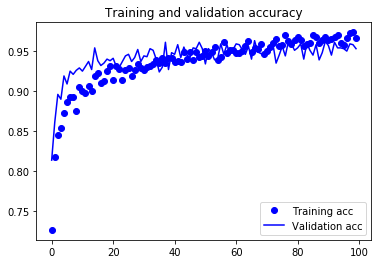

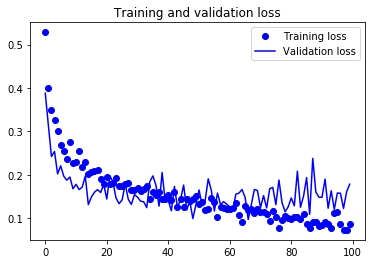

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
model.save('cats_and_dogs_TransferL_finetunedModel.h5')